# SENTIMENTAL ANALYSIS OF YELP REVIEWS FOR RESTAURANTS IN US

Step 1 : Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
%matplotlib inline

Once we have all the above libraries imported we are ready to start the analysis

////////////////////////********************\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

Step 2
# Dataset

This dataset contains approx. 10000 entries. The column decscription is as follows:

Column 1 - Unique Business ID

Column 2 - Date of Review 

Column 3 - Review ID

Column 4 - Stars given by the user

Column 5 - Review given by the user

Column 6 - Type of text entered - Review

Column 7 - Unique User ID

Column 8 - Cool column: The number of cool votes the review received

Column 9 - Useful column: The number of useful votes the review received

Column 10 - Funny Column: The number of funny votes the review received <br>


In [3]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv("yelp.csv")
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)
# COLUMN NAMES
print("Column names:")
print(data.columns)
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(data.head())
# DATASET SUMMARY
data.describe(include='all')

Shape of the dataset:
(10000, 10)
Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')
Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object
Few dataset entries:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday 

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,NaN,Great service,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


Next step is creating a new column for length of the review text

In [4]:
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


//////////////////***************\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

Step 3
# Data visualization


We visualize the relation between some of the predictor variables

(i) Stars and length of the review

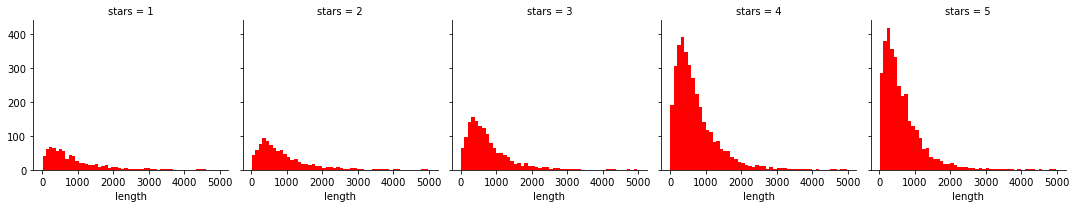

In [8]:
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='red')

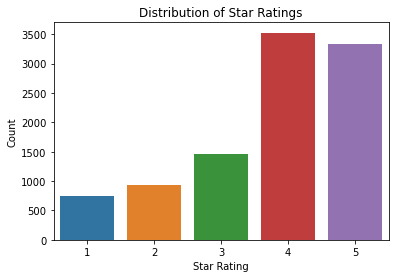

In [38]:
# EDA
sns.countplot(x='stars', data=data)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

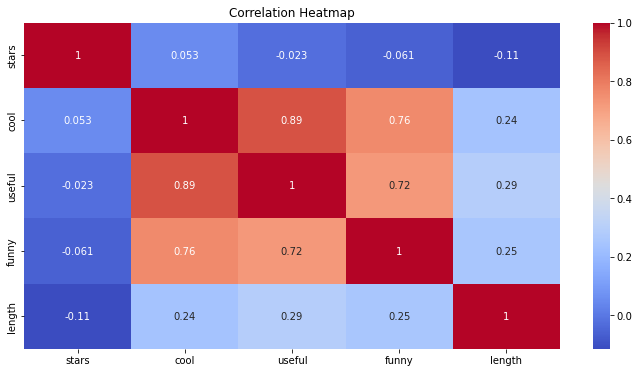

In [39]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

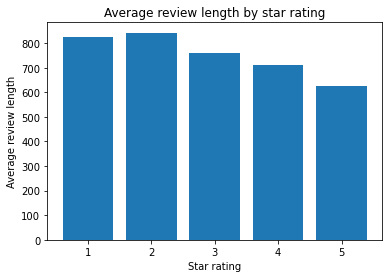

In [40]:
# Calculate the average length of reviews by star rating

avg_length = data.groupby('stars')['length'].mean()
plt.bar(avg_length.index, avg_length.values)
plt.xlabel('Star rating')
plt.ylabel('Average review length')
plt.title('Average review length by star rating')
plt.show()

(ii) Mean value of three review columns: Cool, funny, useful in relation with stars

In [9]:
mean_val = data.groupby('stars').mean()
mean_val

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


(iii) Corelation between the review columns

In [10]:
mean_val.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


From the above matrix, we can see that there is negative corelation between 
* Cool and Useful
* Cool and Funny
* Cool and Length

And, positive corelation between

* Funny and Useful    
* Funny and Length
* Useful and Length

(iv) Classifying the data

In [11]:
data_classes = data[(data['stars']==1)| (data['stars']==2) | (data['stars']==3) | (data['stars']==4) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(10000, 11)
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object
0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64


/////////////////////////*********************\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

Step 4
# Data Cleaning

(i) Removing stopwords and punctuation from the review text

In [12]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

(ii) Vectorization : Vectorization or word embedding is the process of converting text data to numerical vectors.

In [13]:
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names()[19648])
print(vocab.get_feature_names()[10643])

44012
My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
  (0, 417)	1
  (0, 1759)	1
  (0, 2614)	1
  (0, 5093)	1
  (0, 7275)	1
  (0, 7452)	2
  (0, 8904)	1
  (0, 1

In the above script, we vectorized one review text. Now, we will vectorize the whole set.

In [19]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (10000, 44012)
Non-Zero occurences:  583230
Density of the matrix =  0.1325161319640098



(iii) Data split

Splitted the data into 80% training data and 20% testing data

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

//////////////////////////*************************\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\


# Data Modelling

We will now use multiple machine learning algorithms and compare them. Setting all the parameters default after repeated parameter tuning for all the models.

1) Multinomial Naive Bayes: The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).



In [26]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 30  24  15  55  21]
 [  6   6  18 133  15]
 [  2   2  15 246  38]
 [  4   3  15 548 143]
 [  2   2   8 286 363]]
Score: 48.1
Classification Report:               precision    recall  f1-score   support

           1       0.68      0.21      0.32       145
           2       0.16      0.03      0.06       178
           3       0.21      0.05      0.08       303
           4       0.43      0.77      0.55       713
           5       0.63      0.55      0.59       661

    accuracy                           0.48      2000
   macro avg       0.42      0.32      0.32      2000
weighted avg       0.46      0.48      0.43      2000



We can see that accuracy is low at 48%
*********************************

2) Random forest classifier: A random forest is a meta estimator that fits a number of decision tree classifiers 
on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 23   7   1  69  45]
 [  3   3   5 133  34]
 [  0   3   5 239  56]
 [  1   3   5 500 204]
 [  0   1   1 259 400]]
Score: 46.55
Classification Report:               precision    recall  f1-score   support

           1       0.85      0.16      0.27       145
           2       0.18      0.02      0.03       178
           3       0.29      0.02      0.03       303
           4       0.42      0.70      0.52       713
           5       0.54      0.61      0.57       661

    accuracy                           0.47      2000
   macro avg       0.46      0.30      0.28      2000
weighted avg       0.45      0.47      0.40      2000



Even this algorithm has less accuracy.
*****

3) Decision tree classifier: DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. In case that there are multiple classes with the same and highest probability, the classifier will predict the class with the lowest index amongst those classes


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 35  26  21  40  23]
 [ 27  29  30  55  37]
 [ 12  40  67 116  68]
 [ 32  51  90 312 228]
 [ 28  24  58 239 312]]
Score: 37.75
Classification Report:               precision    recall  f1-score   support

           1       0.26      0.24      0.25       145
           2       0.17      0.16      0.17       178
           3       0.25      0.22      0.24       303
           4       0.41      0.44      0.42       713
           5       0.47      0.47      0.47       661

    accuracy                           0.38      2000
   macro avg       0.31      0.31      0.31      2000
weighted avg       0.37      0.38      0.37      2000



***


4) Support Vector Machine: Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [29]:
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 25  10   1  60  49]
 [  7  18   9 112  32]
 [  2   1  26 217  57]
 [  1   0   4 476 232]
 [  0   1   0 228 432]]
Score: 48.85
Classification Report:               precision    recall  f1-score   support

           1       0.71      0.17      0.28       145
           2       0.60      0.10      0.17       178
           3       0.65      0.09      0.15       303
           4       0.44      0.67      0.53       713
           5       0.54      0.65      0.59       661

    accuracy                           0.49      2000
   macro avg       0.59      0.34      0.34      2000
weighted avg       0.54      0.49      0.44      2000



***

5) Gradient Boosting Classifier: Gradient boosting algorithm can be used for predicting not only continuous target variable (as a Regressor) but also categorical target variable (as a Classifier).

In [31]:
# Here, we are setting the parameters after the below parameter tuning:
"""# parameter evaluation
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""


"# parameter evaluation\ngbe = GradientBoostingClassifier(random_state=0)\nparameters = {\n     'learning_rate': [0.05, 0.1, 0.5],\n    'max_features': [0.5, 1],\n    'max_depth': [3, 4, 5]}\ngridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')\ngridsearch.fit(x,y)\nprint(gridsearch.best_params_)\nprint(gridsearch.best_score_)"

As it takes a lot of time in executing the parameter tuning, it is not directly ran in this script. However, below parameters are best for final model fitting. 

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[ 47  13  12  35  38]
 [ 19  15  24  85  35]
 [  6  17  46 178  56]
 [  6  12  20 416 259]
 [  2   4  11 207 437]]
Score: 48.05
Classification Report:               precision    recall  f1-score   support

           1       0.59      0.32      0.42       145
           2       0.25      0.08      0.13       178
           3       0.41      0.15      0.22       303
           4       0.45      0.58      0.51       713
           5       0.53      0.66      0.59       661

    accuracy                           0.48      2000
   macro avg       0.44      0.36      0.37      2000
weighted avg       0.46      0.48      0.45      2000



The accuracy of gradient boost classifier is 48%
***

6) KNN classifier: K-nearest neighbors classifier is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 21   3  15  28  78]
 [ 18   1   7  54  98]
 [ 27   5  15 111 145]
 [ 37   2  16 245 413]
 [ 33   4  10 156 458]]
Score:  37.0
Classification Report:
              precision    recall  f1-score   support

           1       0.15      0.14      0.15       145
           2       0.07      0.01      0.01       178
           3       0.24      0.05      0.08       303
           4       0.41      0.34      0.37       713
           5       0.38      0.69      0.49       661

    accuracy                           0.37      2000
   macro avg       0.25      0.25      0.22      2000
weighted avg       0.33      0.37      0.32      2000



***
7) XG boost classifier: Boosting is an ensemble modelling, technique that attempts to build a strong classifier from the number of weak classifiers.


In [33]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

/Users/abhinay/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:45:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix for XGBoost Classifier:
[[ 51  23  10  33  28]
 [ 26  27  34  56  35]
 [  7  24  49 163  60]
 [  6   9  42 416 240]
 [  5   2   9 230 415]]
Score:  47.9
Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.35      0.42       145
           2       0.32      0.15      0.21       178
           3       0.34      0.16      0.22       303
           4       0.46      0.58      0.52       713
           5       0.53      0.63      0.58       661

    accuracy                           0.48      2000
   macro avg       0.44      0.38      0.39      2000
weighted avg       0.46      0.48      0.46      2000



***
8) Multilayer perceptron: Multilayer perceptron (MLP) is a technique of feed-forward artificial neural networks using a back propagation learning method to classify the target variable used for supervised learning.

In [34]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 65  33  15  14  18]
 [ 34  48  46  33  17]
 [ 11  32  98 109  53]
 [  6  20  96 364 227]
 [ 12   9  24 229 387]]
Score: 48.1
Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.45      0.48       145
           2       0.34      0.27      0.30       178
           3       0.35      0.32      0.34       303
           4       0.49      0.51      0.50       713
           5       0.55      0.59      0.57       661

    accuracy                           0.48      2000
   macro avg       0.45      0.43      0.44      2000
weighted avg       0.48      0.48      0.48      2000



***
From the above results we can see the accuracies of all the models.
* Multilayer Perceptron = 48.1%
* Multinomial Naive Bayes = 48.1%
* Gradient Boosting Classifier = 48%
* XGBoost Classifier = 47.9%
* Random Forest Classifier = 46.55%
* Decision Tree = 37.75%
* K Neighbor Classifier = 37%
* Support Vector Machine  = 48.85%

SVM gave the best results but not comparitively higher than other models. 

Almost every model results are identical except for decision tree and KNN classifiers.


# Testing


In [36]:
pr = data['text'][5]
print(pr)
print("Actual Rating: ",data['stars'][5])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

Quiessence is, simply put, beautiful.  Full windows and earthy wooden walls give a feeling of warmth inside this restaurant perched in the middle of a farm.  The restaurant seemed fairly full even on a Tuesday evening; we had secured reservations just a couple days before.

My friend and I had sampled sandwiches at the Farm Kitchen earlier that week, and were impressed enough to want to eat at the restaurant.  The crisp, fresh veggies didn't disappoint: we ordered the salad with orange and grapefruit slices and the crudites to start.  Both were very good; I didn't even know how much I liked raw radishes and turnips until I tried them with their pesto and aioli sauces.

For entrees, I ordered the lamb and my friend ordered the pork shoulder.  Service started out very good, but trailed off quickly.  Waiting for our food took a very long time (a couple seated after us received and finished their entrees before we received our's), and no one bothered to explain the situation until the mait

4

In [37]:
# giving a random review to fit to the model and finding the rating
rr= "the restaurant was so lively. it has the atmosphere of fine dining yet keeping things so simple. The food was so delicious from appetizers to desserts. The prices are also modest so that an average person can afford. Top class."
rr_t=vocab.transform([rr])
mlp.predict(rr_t)[0]

5